## import necessary libraries

Import `pandas as pd`, `numpy as np` and `seaborn as sns`
Furthermore, import `Pipeline` from `sklearn.pipeline`, `RandomForestClassifier` from `sklearn.ensemble` and `train_test_split` from `sklearn.model_selection`.

Import `accuracy_score`, `f1_score`, `precision_score`, `hamming_loss` and `confusion_matrix` from `sklearn.metrics`. 

Finally, import `CountVectorizer` and `TfidfTransformer` from `sklearn.feature_extraction.text` and `pplot_cm` from `conf_matrix` (this script should be in your local repo) and `matplotlib.pyplot` as `plt`.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, hamming_loss, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from conf_matrix import pplot_cm
import matplotlib.pyplot as plt

## load data

Load your previously saved csv dataframe using pandas' `read_csv()`.

In [2]:

data_fail = pd.read_csv("../message_classification/data/training_data_tweets.csv")
data_fail.columns = ['sentiment', 'message']

data_fail['message']

data_fail['message'].iloc[1789]

data_fail[data_fail['message'].isna()]

,sentiment,message


In [3]:
data

,id,sentiment,md5,list,message
0,364483696570945536,neutral,a6416685aa01bb28315ec81baa50639d,[],Not Available
1,373606425379225600,positive,e9f93f030ab466d8aa624d1bfb33d31b,[],Not Available
2,367189542857482240,neutral,c020aa23ff1f8ff985ce489b2b678674,[],Tainted Talents (Ateliertagebuch.) » Wir sind ...
3,368327046574776321,neutral,0096b66e311fffcca65c23d2a310083b,[],Aber wenigstens kommt #Supernatural heute mal ...
4,390690148188712960,positive,66ffcee70a34442d5e3df0b39e359d11,[],Not Available
...,...,...,...,...,...
9933,373714852122202112,negative,d0c4b34c6db04a64d074d2e46c57df62,[],@AstridSchiebs Okay. @DerAtrox Machse einfach!...
9934,376593709280034816,neutral,f3a201478826ba5b73ee0d70022a90a7,[],Öffentliche Pfeifturmbegehung Führung um 11:30...
9935,377180450500136961,positive,2c0c0c7538e0695bf137126cfcb9fb77,[],Not Available
9936,364054346767405056,positive,6b0352b5c96a7002897d5af3eb9a1c6f,[],"@FrauFlauschig Ich mag ihn auch echt gerne, ha..."


In [4]:
data_fail

,sentiment,message
0,neutral,Aber wenigstens kommt #Supernatural heute mal ...
1,neutral,DARLEHEN - Angebot für Schufa-freie Darlehen: ...
2,neutral,ANRUF ERWÜNSCHT: Hardcore Teeny Vicky Carrera:...
3,neutral,Na? Wo sind Frankens heimliche Talente? - Die ...
4,positive,... Glück breitet sich aus ...
...,...,...
6721,neutral,Wirtschaftsminister Mitterlehner zeichnet café...
6722,neutral,"CL-Qualifikation: Zenit mit Kantersieg, Austri..."
6723,negative,Okay. Machse einfach! EU.
6724,neutral,Öffentliche Pfeifturmbegehung Führung um 11:30...


## plot label frequencies

Set the seaborn color palette to "deep" using `sns.set()`.
Then, plot the label frequencies using `sns.countplot()` on the column "sentiment" (or what ever you have called it).

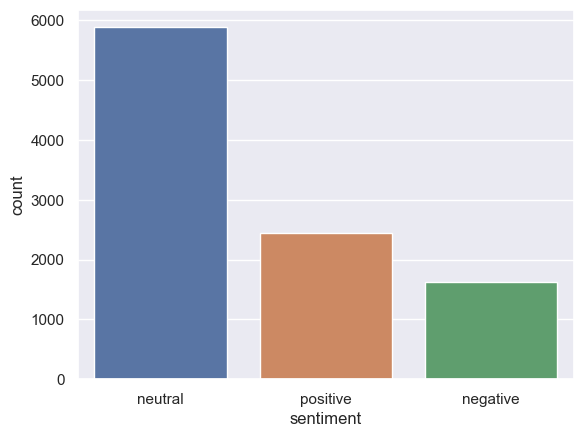

In [5]:
sns.set(palette="deep")
sns.countplot(data = data, x="sentiment")
plt.show()

## load stopwords

Use stop words to remove less-meaningful words. The logic of removing stop words has to do with the fact that these words don't carry a lot of meaning, and they appear a lot in most text. We have provided you with a list of common German stopwords ('data/stopwords_german.txt'). Import the packages `io` and `unidecode` first, then use `io.open()` and `readlines()` to save the words contained in the .txt file to a list. 

Call the python string function `strip()` to remove newline characters (`\n`) and unidecode's `unidecode()` on every element in the resulting list.

In [6]:
# you can also add your own stopwords in this step using append()
import io, unidecode

stopwords = []
reader = io.open("../message_classification/data/stopwords_german.txt")
with io.open("../message_classification/data/stopwords_german.txt") as f:
    stopwords = [unidecode.unidecode(line.strip()) for line in f]
    # stopwords.append(formated_words)

In [7]:
stopwords

['a',
 'ab',
 'aber',
 'ach',
 'acht',
 'achte',
 'achten',
 'achter',
 'achtes',
 'ag',
 'alle',
 'allein',
 'allem',
 'allen',
 'aller',
 'allerdings',
 'alles',
 'allgemeinen',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'au',
 'auch',
 'auf',
 'aus',
 'ausser',
 'ausserdem',
 'auAYer',
 'auAYerdem',
 'b',
 'bald',
 'bei',
 'beide',
 'beiden',
 'beim',
 'beispiel',
 'bekannt',
 'bereits',
 'besonders',
 'besser',
 'besten',
 'bin',
 'bis',
 'bisher',
 'bist',
 'c',
 'd',
 'd.h',
 'da',
 'dabei',
 'dadurch',
 'dafA 1/4r',
 'dagegen',
 'daher',
 'dahin',
 'dahinter',
 'damals',
 'damit',
 'danach',
 'daneben',
 'dank',
 'dann',
 'daran',
 'darauf',
 'daraus',
 'darf',
 'darfst',
 'darin',
 'darum',
 'darunter',
 'darA 1/4ber',
 'das',
 'dasein',
 'daselbst',
 'dass',
 'dasselbe',
 'davon',
 'davor',
 'dazu',
 'dazwischen',
 'daAY',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 '

## split data for training

To train and evaluate the model, we split the data into a training set and a test set using `train_test_split()`, the arguments  being the text column, the label/sentiment column, a test set size (`test_size=0.1` for 10%, `test_size=0.3` for 30%, etc.) and a integer of your choice as random_state.

You can then call `.shape` on the resulting sets to see their dimensions.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data_fail['message']), np.array(data_fail['sentiment']), test_size=0.3, random_state=5)

In [9]:
data['message'].iloc[0]
#data['sentiment']
#np.array(data['sentiment'])

'Not Available'

In [10]:
data_fail['message'].iloc[0]
#data_fail['sentiment']

'Aber wenigstens kommt #Supernatural heute mal wieder um 22 Uhr - ein schwacher Trost'

## set up ML pipeline

Instantiate a pipeline by adding 3 steps: a `CountVectorizer()` `'vect'`, a `TfidfTransformer()` `'tfidf'` and a `RandomForestClassifier()` `'rf'`.

The [Countvectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) helps us to create numerical values from text by counting the inherent tokens. Pass `analyzer='word'`, `strip_accents='unicode'` and `lowercase=True`. Pass your list of stopwords as `stop_words`.

The arguments for the `TfidfTransformer` are `use_idf=True` and `smooth_idf=True`.

Fit your pipeline to the training data by calling `fit()` on the pipeline object and passing the training texts and training labels.

In [11]:
pipeline = Pipeline([
    (
        'vect',
        CountVectorizer(analyzer='word', strip_accents='unicode', lowercase=True, stop_words=stopwords)
    ),
    (
        'tfidf',
        TfidfTransformer(use_idf=True, smooth_idf=True)
    ),
    (
        'rf',
        RandomForestClassifier()
    )
])

In [12]:
# fit pipeline to training data
pipeline.fit(X_train, y_train)

c:\Projects-G15\abticket\coding-assessment-full-stack\.venv\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['4ayt', '4ber', '4berhaupt', '4brigens', '4ck', '4her', '4nf', '4nfte', '4nften', '4nfter', '4nftes', '4r', '4rde', '4rden', '4rfen', '4rft', '4rlich', '4ssen', '4sst', 'auayer', 'auayerdem', 'ay', 'chst', 'daay', 'dafa', 'dara', 'demgegena', 'demgema', 'dermaayen', 'fa', 'fra', 'gegena', 'groay', 'groaye', 'groayen', 'groayer', 'groayes', 'ha', 'hrend', 'hrenddem', 'hrenddessen', 'kapnnen', 'kapnnt', 'kapnnte', 'ma', 'mapchte', 'mapgen', 'mapglich', 'mapgt', 'muay', 'muayt', 'nata', 're', 'spa', 'ss', 'ter', 'tte', 'tten', 'wa', 'wahr', 'zuna', 'zura', 'zwaplf'] not in stop_words.
  % sorted(inconsistent)


Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['a', 'ab', 'aber', 'ach', 'acht',
                                             'achte', 'achten', 'achter',
                                             'achtes', 'ag', 'alle', 'allein',
                                             'allem', 'allen', 'aller',
                                             'allerdings', 'alles',
                                             'allgemeinen', 'als', 'also', 'am',
                                             'an', 'ander', 'andere', 'anderem',
                                             'anderen', 'anderer', 'anderes',
                                             'anderm', 'andern', ...],
                                 strip_accents='unicode')),
                ('tfidf', TfidfTransformer()),
                ('rf', RandomForestClassifier())])

## score model

We have provided you with a function to score your model using the test texts and labels. In case of encoding issues calling `.values.astype('U')` on the texts before passing them to your pipeline might help.

In [13]:
def score_model(true, pred):
    print('Accuracy:', accuracy_score(true, pred))
    print('F1:', f1_score(true, pred, average='weighted'))
    print('Precision:', precision_score(true, pred, average='weighted'))
    print('Hamming loss', hamming_loss(true, pred))


y_pred = pipeline.predict(X_test)
score_model(y_test, y_pred)

Accuracy: 0.6689791873141725
F1: 0.6386216093593573
Precision: 0.6409670827233725
Hamming loss 0.33102081268582756


## plot confusion matrix

To quickly plot a confusion matrix, use the provided function pplot_cm and pass the same arguments as with `score_model()`.

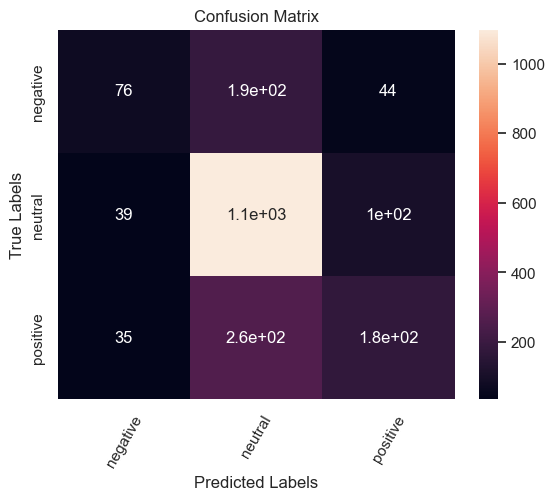

Accuracy: 0.6689791873141725
F1: 0.6386216093593573
Precision: 0.6409670827233725
Hamming loss 0.33102081268582756


In [14]:
# plot a confucion matrix to visualize true positives, true negatives, ...
# https://en.wikipedia.org/wiki/Confusion_matrix
pplot_cm(y_test, y_pred)

## manual tests

Pass the example texts from the repo description to `pipeline.predict()` and play around with new texts to get a feeling for how your model determines a sentiment.

In [15]:
# use your pipeline to create class predictions for the three example texts given in the readme

example1 = ["Bin rundum begeistert. Insbesondere die Musikwiedergabe ist eine tolle Sache.", 
            "Die Bedienung lässt keine Wünsche übrig und ist kinderleicht. Beste Grüße, Max"]

example2 = ["Startet leider nicht mehr. Ich hatte den Echo leider nur ca. 3 Stunden einwandfrei in Betrieb, danach ging er leider nicht mehr.", 
            "Kann mir vl jemand sagen wie ich ihn wieder zum Laufen bringe oder ob er einfach nur kaputt ist?"]

example3 = ["Gut, aber im Alltag noch nicht ausgereift. Amazon Echo ist eine praktische Sache allerdings",
            "wenn man kein Smart-Home hat ist der Einsatzbereich begrenzt."]

ex1_pd = pd.DataFrame(example1, columns=["message"])
ex2_pd = pd.DataFrame(example2, columns=["message"])
ex3_pd = pd.DataFrame(example3, columns=["message"])
print(example1)
print(pipeline.predict(ex1_pd['message']))
print(example2)
print(pipeline.predict(ex2_pd['message']))
print(example3)
print(pipeline.predict(ex3_pd['message']))

['Bin rundum begeistert. Insbesondere die Musikwiedergabe ist eine tolle Sache.', 'Die Bedienung lässt keine Wünsche übrig und ist kinderleicht. Beste Grüße, Max']
['positive' 'positive']
['Startet leider nicht mehr. Ich hatte den Echo leider nur ca. 3 Stunden einwandfrei in Betrieb, danach ging er leider nicht mehr.', 'Kann mir vl jemand sagen wie ich ihn wieder zum Laufen bringe oder ob er einfach nur kaputt ist?']
['negative' 'positive']
['Gut, aber im Alltag noch nicht ausgereift. Amazon Echo ist eine praktische Sache allerdings', 'wenn man kein Smart-Home hat ist der Einsatzbereich begrenzt.']
['neutral' 'neutral']
